# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please use caution when interpreting the code or results.

## Overview of the Dandiset

**Title**: Calcium Imaging in SMA and M1 of Macaques  
**ID**: DANDI:001174/draft  
**Description**: The study of motor cortices in non-human primates is relevant to human motor control. This dataset was collected using calcium imaging methods to study multiple neurons in the supplementary motor (SMA) and primary motor areas (M1) in macaques during various tasks.  
**License**: CC-BY-4.0  
**Keywords**: One-photon calcium imaging, non-human primates, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens  
**Cite**: Galvan et al. (2025)

## Notebook Content Summary

In this notebook, we'll cover:
- Loading data from the Dandiset using the DANDI API.
- Exploring the metadata and available data from an NWB file.
- Visualizing data from the NWB file to gain insights.

## Required Packages
- pynwb
- h5py
- remfile
- matplotlib
- seaborn

In [1]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Load the Dandiset Data

Using the DANDI API to access Dandiset 001174 and review its assets.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Load Metadata from an NWB File

Here, we'll use one of the NWB files in the Dandiset to extract and explore metadata, session details, and the structure of the data available.

In [3]:
# Load NWB file via URL
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Number of acquisition data series: {len(nwb.acquisition)}")

Session description: Calcium imaging in SMA during the spontaneous condition
Number of acquisition data series: 1


## Visualize OnePhotonSeries Data

We visualize a section of the OnePhotonSeries data to explore neuron activity patterns.

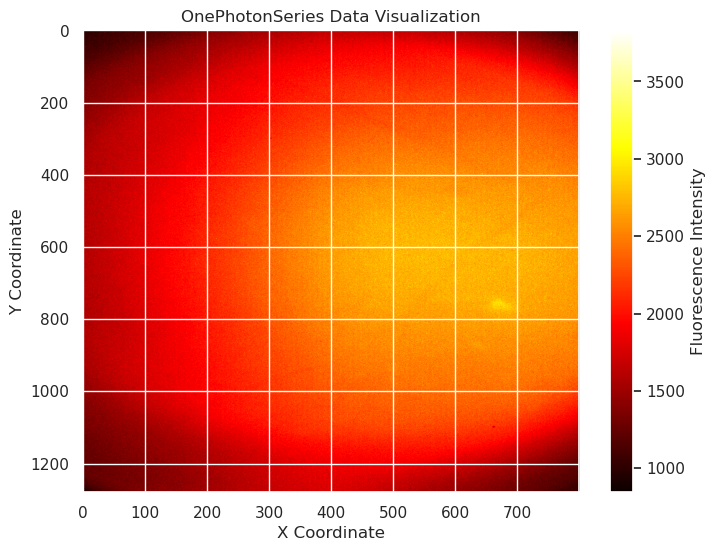

In [4]:
one_photon_series = nwb.acquisition["OnePhotonSeries"]

# Load a subset of the data
data_subset = one_photon_series.data[0, :, :]

plt.figure(figsize=(8, 6))
plt.imshow(data_subset, aspect='auto', cmap='hot')
plt.colorbar(label='Fluorescence Intensity')
plt.title('OnePhotonSeries Data Visualization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

## Conclusion and Future Directions

In this notebook, we've demonstrated how to load and begin exploring data in Dandiset 001174. You can continue to explore additional data series within the NWB file and add more advanced visualizations or analyses from here.